In [1]:
import pandas as pd

In [5]:
nrdf = pd.read_csv('nrdf.csv', index_col=0)

In [7]:
len(nrdf['speaker'].unique())

56

In [24]:
nrdf

,date_x,section,speaker,svect,voter,exp,female,region,chair,diffavg,merge_date,date_y,unrate,pceinf,corepceinf
0,1999-02-03,1,boehne,[ 0. 1. 0. 0. ...,1.0,18.016438,0.0,Philadelphia,Greenspan,2.965565,1999-02,1999-02-01,4.4,6.55858,1.22177
1,1999-02-03,1,broaddus,[ 0. 0.22751638 0.2874049 -0.325673...,0.0,6.093151,0.0,Richmond,Greenspan,2.992641,1999-02,1999-02-01,4.4,6.55858,1.22177
2,1999-02-03,1,ferguson,[ 0. 0. -0.37040359 0. ...,1.0,1.246575,0.0,governor,Greenspan,2.651676,1999-02,1999-02-01,4.4,6.55858,1.22177
3,1999-02-03,1,gramlich,[ 0. -0.61315077 0. 0. ...,1.0,1.246575,0.0,governor,Greenspan,4.650914,1999-02,1999-02-01,4.4,6.55858,1.22177
4,1999-02-03,1,greenspan,[ 0. 0. 0. 0. ...,1.0,11.490411,0.0,governor,Greenspan,1.918389,1999-02,1999-02-01,4.4,6.55858,1.22177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,2017-12-13,2,powell,[ 0. 0. 3.24953063 0. ...,1.0,5.556164,0.0,governor,Yellen,1.687786,2017-12,2017-12-01,4.1,5.07616,1.57688
4657,2017-12-13,2,quarles,[0.26322263 0. 3.97897664 0. 0...,1.0,0.238356,0.0,governor,Yellen,2.460575,2017-12,2017-12-01,4.1,5.07616,1.57688
4658,2017-12-13,2,rosengren,[ 0.3725851 0. 0.37957125 0. ...,0.0,10.408219,0.0,Boston,Yellen,1.986754,2017-12,2017-12-01,4.1,5.07616,1.57688
4659,2017-12-13,2,williams,[ 0.43648208 0.37931034 3.77248189 0. ...,0.0,6.791781,0.0,San Francisco,Yellen,2.514672,2017-12,2017-12-01,4.1,5.07616,1.57688


/tmp/ipykernel_37059/2544411295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
/tmp/ipykernel_37059/2544411295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']


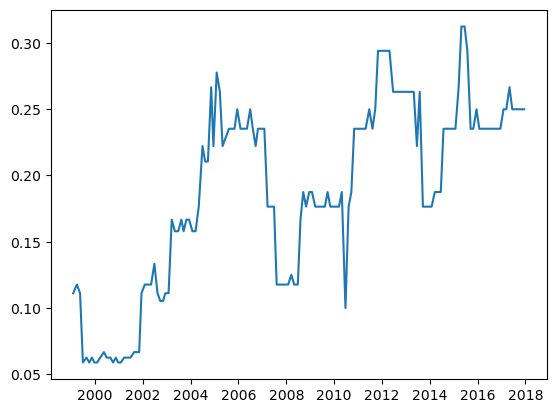

In [48]:
gdf = nrdf.loc[nrdf['section'] == 1, ['date_x', 'female', 'speaker']].groupby(['date_x', 'female']).agg(count=('speaker', 'count')).reset_index()
# pivoted = gdf.pivot(index='date_x', columns='female', values='count').reset_index()

# pivoted
gdf['total'] = gdf.groupby('date_x')['count'].transform('sum')
gdf_fem = gdf[gdf['female'] == 1]
gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']
plt.plot(gdf_fem['date'], gdf_fem['prop_fem'])

In [72]:
expdf = nrdf.groupby('date_x', as_index=False).agg({'exp': ['min', 'max', 'median']})
expdf.columns = ["_".join(col_name).rstrip("_") for col_name in expdf.columns]

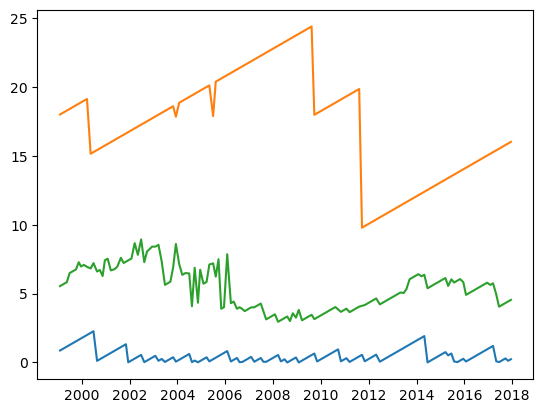

In [73]:
expdf
fig, ax = plt.subplots()
expdf['date'] = pd.to_datetime(expdf['date_x'])
ax.plot(expdf['date'], expdf['exp_min'])
ax.plot(expdf['date'], expdf['exp_max'])
ax.plot(expdf['date'], expdf['exp_median'])